<a href="https://colab.research.google.com/github/Andron00e/CV_intro/blob/main/mediapipe_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2

In [10]:
!wget https://pypi.org/project/autopy/

--2023-04-21 17:04:48--  https://pypi.org/project/autopy/
Resolving pypi.org (pypi.org)... 151.101.64.223, 151.101.0.223, 151.101.128.223, ...
Connecting to pypi.org (pypi.org)|151.101.64.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212276 (207K) [text/html]
Saving to: ‘index.html’

index.html          100%[===================>] 207.30K  --.-KB/s    in 0.03s   

2023-04-21 17:04:49 (6.78 MB/s) - ‘index.html’ saved [212276/212276]



In [11]:
!pip install -q flatbuffers==2.0.0
!pip install -q mediapipe==0.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 3.5 MB/s eta 0:00:00


In [12]:
import mediapipe as mp

In [13]:
!wget -O gesture_recognizer.task -q https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/gesture_recognizer.task

# photo test

importing photo

In [14]:
!wget -q -O photo.jpg https://storage.googleapis.com/khanhlvg_ml/wimls_22/fist.jpg

In [17]:
from google.colab.patches import cv2_imshow

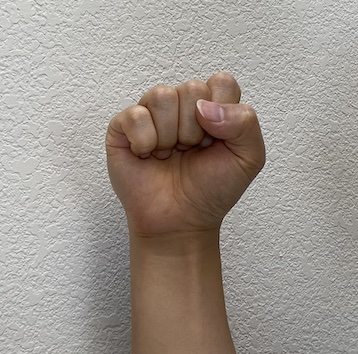

In [18]:
img_test = cv2.imread('photo.jpg')
cv2_imshow(img_test)

In [22]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode

<IPython.core.display.Javascript object>

Saved to photo.jpg


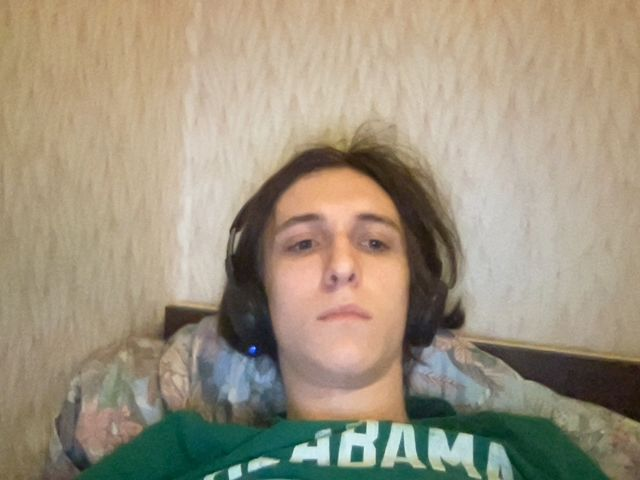

In [23]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

recognize gesture from the imaage

In [24]:
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import os

In [25]:
model_path = os.path.abspath("gesture_recognizer.task")
recognizer = vision.GestureRecognizer.create_from_model_path(model_path)

In [26]:
image = mp.Image.create_from_file('photo.jpg')

In [27]:
recognition_result = recognizer.recognize(image)

In [29]:
top_gesture = recognition_result.gestures[0][0]
print(f"Gesture recognized: {top_gesture.category_name} ({top_gesture.score})")

IndexError: ignored

In [30]:
!wget -q -O rps.zip https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/rps_data_sample.zip
!unzip -qq rps.zip

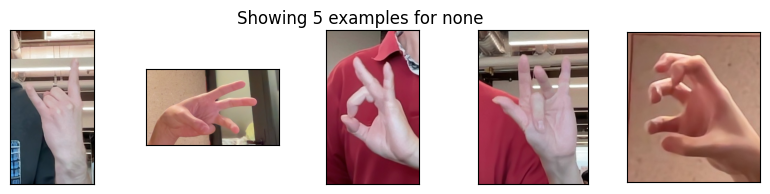

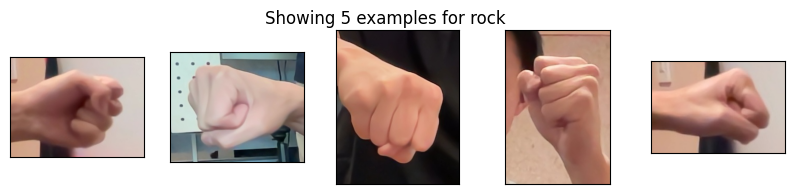

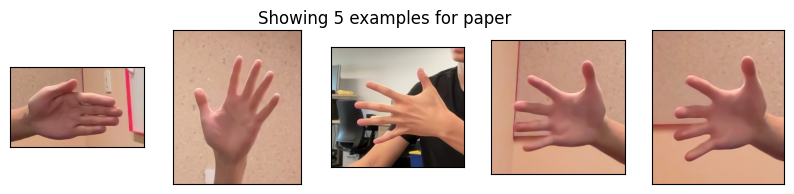

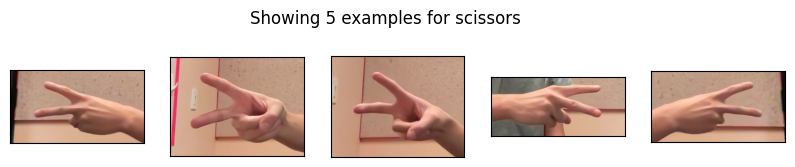

In [31]:
import matplotlib.pyplot as plt

NUM_EXAMPLES = 5
IMAGES_PATH = "rps_data_sample"

# Get the list of labels from the list of folder names.
labels = []
for i in os.listdir(IMAGES_PATH):
  if os.path.isdir(os.path.join(IMAGES_PATH, i)):
    labels.append(i)

# Show the images.
for label in labels:
  label_dir = os.path.join(IMAGES_PATH, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

In [32]:
!pip install -q mediapipe-model-maker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 23.7 MB/s eta 0:00:00


In [33]:
from mediapipe_model_maker import gesture_recognizer

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [34]:
data = gesture_recognizer.Dataset.from_folder(
    dirname=IMAGES_PATH,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)

train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)  

In [37]:
hparams = gesture_recognizer.HParams(export_dir="rock_paper_scissors_model")
options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer)  [(None, 128)]            0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 custom_gesture_recognizer_o  (None, 4)                516       
 ut (Dense)                                                      
                                                                 
Total params: 1,028
Trainable params: 772
Non-trainable param

In [38]:
loss, acc = model.evaluate(test_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

48/48 [==============================] - 1s 3ms/step - loss: 0.3565 - categorical_accuracy: 0.7292
Test loss:0.35649847984313965, Test accuracy:0.7291666865348816


In [39]:
model.export_model()

In [40]:
!mv rock_paper_scissors_model/gesture_recognizer.task rock_paper_scissors.task

In [41]:
from google.colab import files
files.download("rock_paper_scissors.task")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

IndexError: ignored

# mouse control with gestures

In [21]:
capture = cv2.VideoCapture(0) #cap abbreviated

while True:
    _, img = capture.read()
    cv2.imshow("From camera", img)
    k = cv2.waitKey(30) & 0xFF
    if k == 27:
        break

capture.release()
cv2.destroyAllWindows()

DisabledFunctionError: ignored